In [1]:
from halotools.sim_manager import CachedHaloCatalog
from halotools.empirical_models import PrebuiltHodModelFactory
import numpy as np
from matplotlib import pyplot as plt
from halotools.mock_observables import hod_from_mock
from Corrfunc import theory
from Corrfunc.utils import convert_rp_pi_counts_to_wp

# Build models and make mocks
## Use prebuilt model provided by halotools

In [39]:
zheng07_model = PrebuiltHodModelFactory('zheng07', threshold = -19.5, redshift = 0)

In [40]:
# zheng07_model.param_dict['logMmin'] = 12.5
zheng07_model.param_dict

{'logMmin': 11.75,
 'sigma_logM': 0.28,
 'logM0': 11.69,
 'logM1': 13.01,
 'alpha': 1.06}

In [42]:
halocat = CachedHaloCatalog(simname = 'multidark', redshift = 0)

In [43]:
halos = halocat.halo_table

In [44]:
print(halos[0:9])

halo_vmax_firstacc halo_dmvir_dt_tdyn ... halo_hostid halo_mvir_host_halo
------------------ ------------------ ... ----------- -------------------
           1998.52           470100.0 ...   792022318  1625000000000000.0
           1675.81           235100.0 ...   792040180  1022000000000000.0
           1611.28           113900.0 ...   789412757   989500000000000.0
           1580.28            80460.0 ...   789736791   871800000000000.0
            1393.3            87060.0 ...   792004706   808600000000000.0
           1344.75             8434.0 ...   789466655   737700000000000.0
           1375.72            15190.0 ...   794038509   662200000000000.0
           1377.82            20280.0 ...   789718735   655400000000000.0
           1363.14            78990.0 ...   792004922   654500000000000.0


In [45]:
print(halos.keys())

['halo_vmax_firstacc', 'halo_dmvir_dt_tdyn', 'halo_macc', 'halo_scale_factor', 'halo_vmax_mpeak', 'halo_m_pe_behroozi', 'halo_xoff', 'halo_spin', 'halo_scale_factor_firstacc', 'halo_c_to_a', 'halo_mvir_firstacc', 'halo_scale_factor_last_mm', 'halo_scale_factor_mpeak', 'halo_pid', 'halo_m500c', 'halo_id', 'halo_halfmass_scale_factor', 'halo_upid', 'halo_t_by_u', 'halo_rvir', 'halo_vpeak', 'halo_dmvir_dt_100myr', 'halo_mpeak', 'halo_m_pe_diemer', 'halo_jx', 'halo_jy', 'halo_jz', 'halo_m2500c', 'halo_mvir', 'halo_voff', 'halo_axisA_z', 'halo_axisA_x', 'halo_axisA_y', 'halo_y', 'halo_b_to_a', 'halo_x', 'halo_z', 'halo_m200b', 'halo_vacc', 'halo_scale_factor_lastacc', 'halo_vmax', 'halo_m200c', 'halo_vx', 'halo_vy', 'halo_vz', 'halo_dmvir_dt_inst', 'halo_rs', 'halo_nfw_conc', 'halo_hostid', 'halo_mvir_host_halo']


In [46]:
halos['halo_pid', 'halo_upid', 'halo_hostid', 'halo_z', 'halo_vz']

halo_pid,halo_upid,halo_hostid,halo_z,halo_vz
int64,int64,int64,float32,float32
-1,-1,792022318,78.23782,-254.34
-1,-1,792040180,172.08052,-464.07
-1,-1,789412757,34.72453,-15.69
-1,-1,789736791,158.68431,-49.06
-1,-1,792004706,13.50465,12.37
-1,-1,789466655,183.52852,-573.56
-1,-1,794038509,79.9436,156.75
-1,-1,789718735,84.49655,173.27
-1,-1,792004922,25.07403,-415.02


In [47]:
halos['halo_hostid'][halos['halo_pid']==1805590461	] # halo pid doesn't point to a specific upid or host id

<Column name='halo_hostid' dtype='int64' length=0>

In [48]:
zheng07_model.populate_mock(halocat)

In [49]:
galaxies = zheng07_model.mock.galaxy_table

In [50]:
len(galaxies), len(halos)

(3174266, 1709942)

In [51]:
print(galaxies[0:9])

halo_rvir halo_hostid halo_vz ... host_centric_distance     y        vy  
--------- ----------- ------- ... --------------------- --------- -------
 2.432366   792022318 -254.34 ...                   0.0 168.86957  257.25
 2.083683   792040180 -464.07 ...                   0.0 181.86922  737.95
 2.061544   789412757  -15.69 ...                   0.0  53.28018   72.86
1.9763161   789736791  -49.06 ...                   0.0 239.42567  179.76
1.9273361   792004706   12.37 ...                   0.0 141.88387   89.81
 1.869349   789466655 -573.56 ...                   0.0  79.54917  425.71
1.8031939   794038509  156.75 ...                   0.0  45.56125  448.62
1.7970611   789718735  173.27 ...                   0.0  230.7207 -220.33
 1.796247   792004922 -415.02 ...                   0.0  208.0427  193.83


In [52]:
print(galaxies.keys())

['halo_rvir', 'halo_hostid', 'halo_vz', 'halo_id', 'halo_y', 'halo_mvir', 'conc_NFWmodel', 'halo_x', 'halo_z', 'halo_vx', 'halo_upid', 'halo_vy', 'halo_num_centrals', 'halo_num_satellites', 'gal_type', 'x', 'vx', 'vz', 'z', 'host_centric_distance', 'y', 'vy']


In [53]:
galaxies['halo_id', 'halo_hostid', 'halo_mvir', 'halo_upid', 'halo_num_centrals', 'halo_num_satellites', 'halo_z', 'halo_vz', 'gal_type', 'z', 'vz']

halo_id,halo_hostid,halo_mvir,halo_upid,halo_num_centrals,halo_num_satellites,halo_z,halo_vz,gal_type,z,vz
int64,int64,float32,int64,int32,int32,float32,float32,object,float32,float32
792022318,792022318,1625000000000000.0,-1,1,221,78.23782,-254.34,centrals,78.23782,-254.34
792040180,792040180,1022000000000000.0,-1,1,130,172.08052,-464.07,centrals,172.08052,-464.07
789412757,789412757,989500000000000.0,-1,1,123,34.72453,-15.69,centrals,34.72453,-15.69
789736791,789736791,871800000000000.0,-1,1,103,158.68431,-49.06,centrals,158.68431,-49.06
792004706,792004706,808600000000000.0,-1,1,105,13.50465,12.37,centrals,13.50465,12.37
789466655,789466655,737700000000000.0,-1,1,84,183.52852,-573.56,centrals,183.52852,-573.56
794038509,794038509,662200000000000.0,-1,1,81,79.9436,156.75,centrals,79.9436,156.75
789718735,789718735,655400000000000.0,-1,1,67,84.49655,173.27,centrals,84.49655,173.27
792004922,792004922,654500000000000.0,-1,1,79,25.07403,-415.02,centrals,25.07403,-415.02


In [54]:
len(galaxies), len(halos[halos['halo_upid']==-1]) # so not every central halo gets a galaxy

(3174266, 1461180)

In [55]:
np.max(galaxies['gal_type'][galaxies['x']!=galaxies['halo_x']]=='centrals') # only centrals have matching halo and galaxy positions and velocities

False

In [56]:
galaxies[galaxies['halo_hostid']==1818294159] # halo_num_centrals and halo_num_satellites tells you number of centrals and halos in the host

halo_rvir,halo_hostid,halo_vz,halo_id,halo_y,halo_mvir,conc_NFWmodel,halo_x,halo_z,halo_vx,halo_upid,halo_vy,halo_num_centrals,halo_num_satellites,gal_type,x,vx,vz,z,host_centric_distance,y,vy
float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,int64,float32,int32,int32,object,float32,float32,float32,float32,float64,float32,float32


### Sanity check by plotting HOD

In [57]:
halo_mass = np.logspace(11, 15, 100)

In [58]:
mean_ncen = zheng07_model.mean_occupation_centrals(prim_haloprop = halo_mass)
mean_nsat = zheng07_model.mean_occupation_satellites(prim_haloprop = halo_mass)

In [59]:
galaxies[galaxies['halo_hostid']==1805589089]

halo_rvir,halo_hostid,halo_vz,halo_id,halo_y,halo_mvir,conc_NFWmodel,halo_x,halo_z,halo_vx,halo_upid,halo_vy,halo_num_centrals,halo_num_satellites,gal_type,x,vx,vz,z,host_centric_distance,y,vy
float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,int64,float32,int32,int32,object,float32,float32,float32,float32,float64,float32,float32


In [60]:
def hod(galaxies_unique, halo_mass, linestyle = '--'):
    
    ind = np.digitize(galaxies_unique['halo_mvir'], halo_mass) # bin the halo masses
    mean_ncen_mock = [np.sum(galaxies_unique['halo_num_centrals'][ind == i])/len(galaxies_unique['halo_num_centrals'][ind == i]) for i in range(len(halo_mass))]
    mean_nsat_mock = [np.sum(galaxies_unique['halo_num_satellites'][ind == i])/len(galaxies_unique['halo_num_satellites'][ind == i]) for i in range(len(halo_mass))]
    
    plt.plot(halo_mass, mean_ncen_mock, label = 'centrals, mock', linestyle = linestyle)
    plt.plot(halo_mass, mean_nsat_mock, label = 'satellites, mock', linestyle = linestyle)
    plt.plot(halo_mass, np.add(mean_ncen_mock, mean_nsat_mock), label = 'total, mock', linestyle = linestyle)
    
    return mean_ncen_mock, mean_nsat_mock

In [61]:
unique_hostid, hostid_ind = np.unique(galaxies['halo_hostid'], return_index = True)

In [62]:
halos_unique = zheng07_model.mock.halo_table

In [63]:
# follow tutorial: https://halotools.readthedocs.io/en/latest/api/halotools.mock_observables.hod_from_mock.html
# this is more accurate than previous method because you're includig the halos that have no galaxies vs all have centrals
cenmask = galaxies['gal_type'] == 'centrals'
central_host_mass = galaxies['halo_mvir'][cenmask]
halo_masses = halos_unique['halo_mvir']
haloprop_bins = np.logspace(11, 15, 15)
mean_ncen_hod, bin_edges = hod_from_mock(central_host_mass, halo_masses, halo_mass)

In [64]:
satmask = galaxies['gal_type'] == 'satellites'
satellite_host_mass = galaxies['halo_mvir'][satmask]
mean_nsat_hod, bin_edges = hod_from_mock(satellite_host_mass, halo_masses, halo_mass)

In [65]:
def recenter(bins):
    return 0.5*(bins[1:]+bins[:-1])

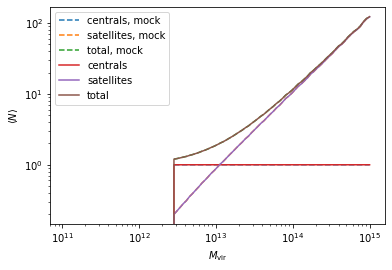

In [66]:
# plt.plot(halo_mass, mean_ncen, label = 'centrals')
# plt.plot(halo_mass, mean_nsat, label = 'satellites')
# plt.plot(halo_mass, mean_ncen+mean_nsat, label = 'total')
# mean_ncen_mock, mean_nsat_mock = hod(galaxies[hostid_ind], halo_mass)
mean_ncen_mock_unique, mean_nsat_mock_unique = hod(halos_unique, halo_mass) 
# plt.plot(halo_mass, mean_ncen_mock, label = 'centrals, mock', linestyle = '--')
# plt.plot(halo_mass, mean_nsat_mock, label = 'satellites, mock', linestyle = '--')
# plt.plot(halo_mass, np.add(mean_ncen_mock,mean_nsat_mock), label = 'total, mock', linestyle = '--')
plt.plot(halo_mass[1:], mean_ncen_hod, label = 'centrals')
plt.plot(halo_mass[1:], mean_nsat_hod, label = 'satellites')
plt.plot(halo_mass[1:], mean_ncen_hod+mean_nsat_hod, label = 'total')
plt.xlabel('$M_\mathrm{vir}$')
plt.ylabel(r'$\langle N \rangle$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

## Measure the median clustering signal from a prebuilt mock

In [67]:
r, xi_cc, xi_cs, xi_ss = zheng07_model.compute_average_galaxy_clustering(gal_type = 'centrals', include_crosscorr = True, num_iterations = 3, num_threads = 'max')

In [68]:
r, xi_cc_auto = zheng07_model.compute_average_galaxy_clustering(gal_type = 'centrals', include_crosscorr = False, num_iterations = 3, num_threads = 'max')

In [69]:
r, xi_ss_auto = zheng07_model.compute_average_galaxy_clustering(gal_type = 'satellites', include_crosscorr = False, num_iterations = 3, num_threads = 'max')

In [70]:
r, xi = zheng07_model.compute_average_galaxy_clustering(include_crosscorr = False, num_iterations = 3, num_threads = 'max')

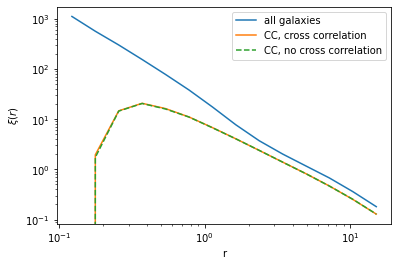

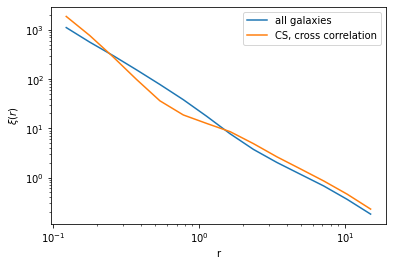

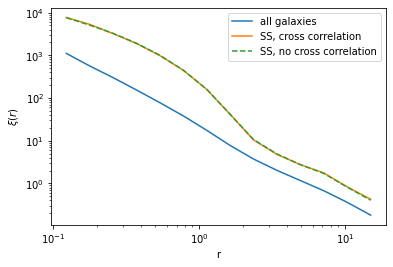

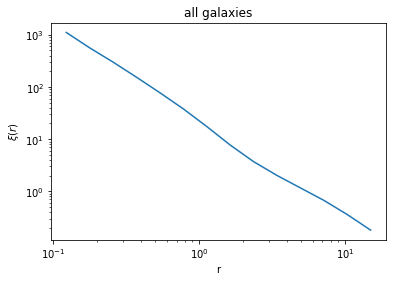

In [71]:
plt.plot(r, xi, label = 'all galaxies')
plt.plot(r, xi_cc_auto, label = 'CC, cross correlation')
plt.plot(r, xi_cc, label = 'CC, no cross correlation', linestyle = '--')
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(r, xi, label = 'all galaxies')
plt.plot(r, xi_cs, label = 'CS, cross correlation')
plt.legend()
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(r, xi, label = 'all galaxies')
plt.plot(r, xi_ss_auto, label = 'SS, cross correlation')
plt.plot(r, xi_ss, label = 'SS, no cross correlation', linestyle = '--')
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(r, xi)
plt.title('all galaxies')
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Calculate wp of halotools mock using Corrfunc

In [72]:
# Create the bins array
rmin = 0.5 # 0.1 # start higher
rmax = 60.0 # 20.0 
nbins = 20 
rbins = np.logspace(np.log10(rmin), np.log10(rmax), nbins + 1) # Mpc/h https://github.com/manodeep/Corrfunc/issues/202

In [73]:
pimax = 40.0

In [76]:
results = theory.wp(boxsize = 1000, nthreads = 8, pimax = pimax, binfile = rbins, X = galaxies['x'], Y = galaxies['y'], 
                      Z = galaxies['z'], output_rpavg = True) 

In [77]:
rpavg = np.load('../results/rpavg_data.npy')
wp = np.load('../results/wp_rmin{}_rmax{}_pimax{}_comoving_flat_sel_rpavg_data.npy'.format(str(rmin), str(rmax), str(pimax)))

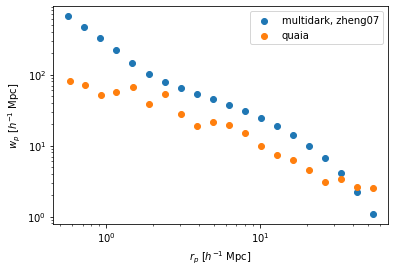

In [78]:
plt.scatter(results['rpavg'], results['wp'], label = 'multidark, zheng07')
plt.scatter(rpavg, wp, label = 'quaia')
plt.xlabel(r'$r_{p}$ $[h^{-1}$ Mpc]') # projected
plt.ylabel("$w_p$ $[h^{-1}$ Mpc]")
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-2,1e2)
# plt.ylim(1e-1,1e4)
plt.legend()
plt.show()

### Try varying $z$

In [82]:
cmap = plt.get_cmap('Greys')(np.linspace(0.333, 0.999, 4))
z = [0, 0.5, 1, 2.15]

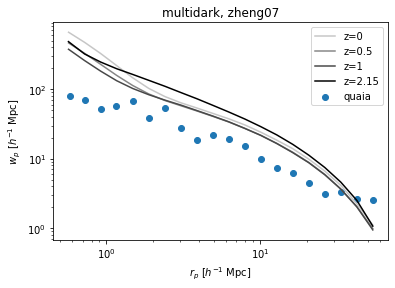

In [84]:
for i in range(len(z)):
    
    zheng07_model = PrebuiltHodModelFactory('zheng07', threshold = -19.5, redshift = z[i])
    halocat = CachedHaloCatalog(simname = 'multidark', redshift = z[i])
    zheng07_model.populate_mock(halocat)
    galaxies = zheng07_model.mock.galaxy_table

    results = theory.wp(boxsize = 1000, nthreads = 8, pimax = pimax, binfile = rbins, X = galaxies['x'], Y = galaxies['y'], 
                          Z = galaxies['z'], output_rpavg = True) 
    
    plt.plot(results['rpavg'], results['wp'], label = 'z='+str(z[i]), color = cmap[i])
    
plt.scatter(rpavg, wp, label = 'quaia')
plt.xlabel(r'$r_{p}$ $[h^{-1}$ Mpc]') # projected
plt.ylabel("$w_p$ $[h^{-1}$ Mpc]")
plt.xscale('log')
plt.yscale('log')
plt.title('multidark, zheng07')
plt.legend()
plt.show()

# Questions
- halo_pid points to any specific subhalo? or it just tells you it's a sub-subhalo?
- halo_id vs halo_hostid for galaxies?
- halo_x vs x for galaxies? halo_vx vs vx? just host halo vs central galaxy?
- do i need to design my own galaxy-halo model?
- will I use halo_tools clustering or corrfunc clustering? 
    - compute_average_galaxy_clustering shouldn't be used in MCMC, and wp function doesn't work on observable data... how do you use halotools with corrfunc?
- confused about bin edges?
- survey realism? lightcone, ra + dec instead of cartesian, selfunc, rsds?